In [ ]:
import json
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.svm import SVC 

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [ ]:
data = pd.read_csv(f'PATH/implementation_sample_1.csv.gz',compression='gzip',lineterminator='\n');

In [ ]:
y = data['class']
X = data.drop(['class'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
svc_model = SVC()
svc_model.fit(X, y)

SVC()

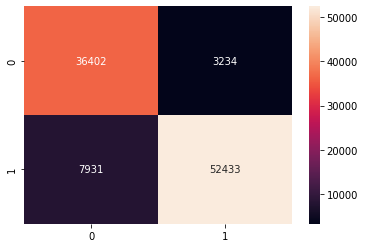

In [ ]:
y_predict_train = svc_model.predict(X)
cm = confusion_matrix(y, y_predict_train)
sns.heatmap(cm, annot=True,fmt="d")

In [ ]:
print(classification_report(y, y_predict_train))

              precision    recall  f1-score   support

         bot       0.82      0.92      0.87     39636
       human       0.94      0.87      0.90     60364

    accuracy                           0.89    100000
   macro avg       0.88      0.89      0.89    100000
weighted avg       0.89      0.89      0.89    100000



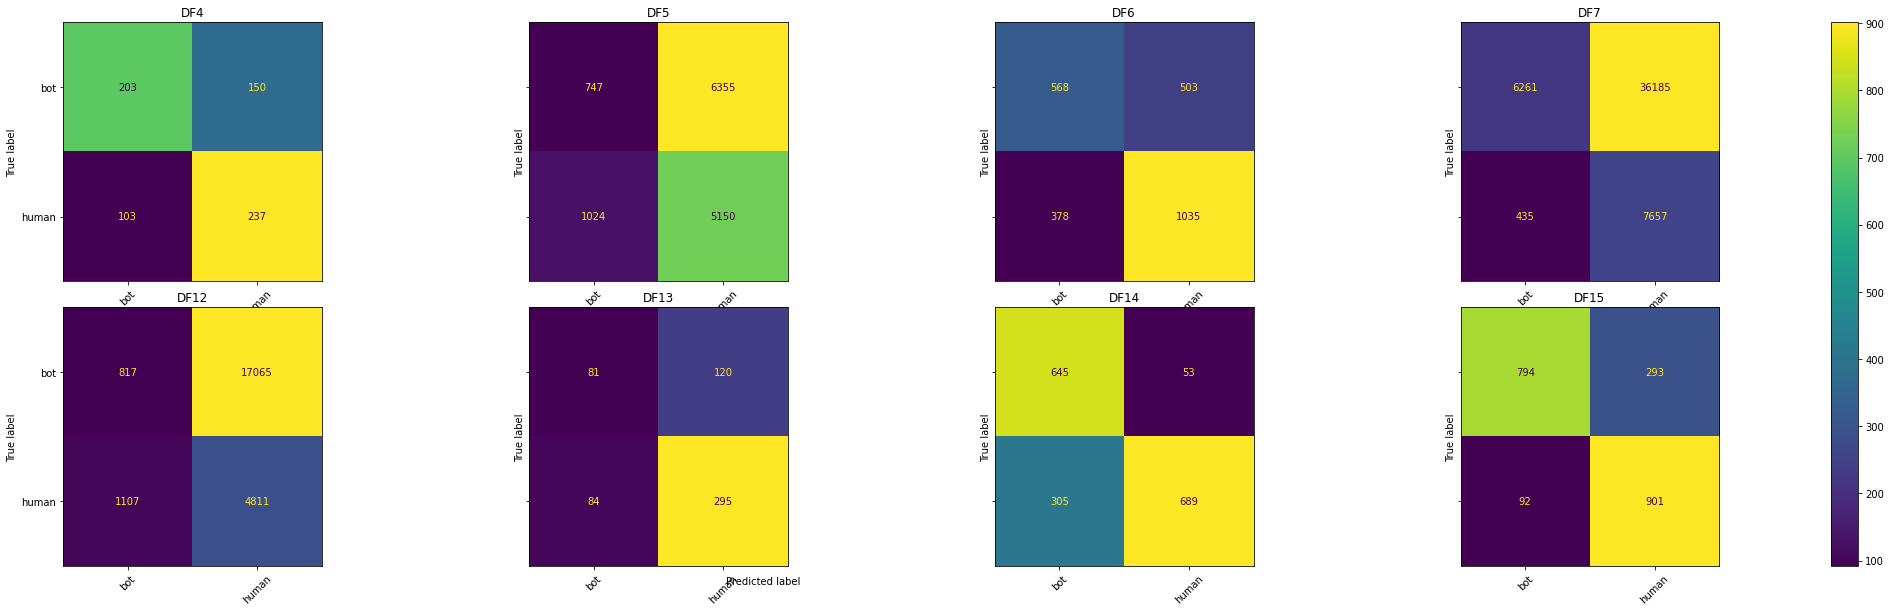

,DS,b-precision,b-recall,b-f1-score,b-total,h-precision,h-recall,h-f1-score,h-total,a-accuracy
0,DF4,0.663399,0.575071,0.616085,353,0.612403,0.697059,0.651994,340,0.634921
1,DF5,0.421796,0.105182,0.168376,7102,0.447631,0.834143,0.582612,6174,0.444185
2,DF6,0.600423,0.530345,0.563213,1071,0.672952,0.732484,0.701457,1413,0.645330
3,DF7,0.935036,0.147505,0.254813,42446,0.174650,0.946243,0.294874,8092,0.275397
4,DF12,0.424636,0.045688,0.082500,17882,0.219921,0.812944,0.346190,5918,0.236471
5,DF13,0.490909,0.402985,0.442623,201,0.710843,0.778364,0.743073,379,0.648276
6,DF14,0.678947,0.924069,0.782767,698,0.928571,0.693159,0.793779,994,0.788416
7,DF15,0.896163,0.730451,0.804866,1087,0.754606,0.907351,0.823960,993,0.814904


In [ ]:
datasets=["DF4","DF5","DF6","DF7","DF12","DF13","DF14","DF15"]
classifer_accuracy_result=pd.DataFrame(columns=["DS","b-precision","b-recall","b-f1-score","b-total","h-precision","h-recall","h-f1-score","h-total","a-accuracy"])

f, axes = plt.subplots(2, 4, figsize=(40, 10), sharey='row')

for index,dataset in enumerate(datasets):
  test = pd.read_csv(f'PATH/{dataset}.csv.gz',compression='gzip',lineterminator='\n');
  test= test.sample(frac=1).reset_index(drop=True)

  y_test_predict = svc_model.predict(test.drop(['class'],axis=1))


  classifer_accuracy_row=[dataset]
  for index_2,(key,value) in enumerate(classification_report(test['class'], y_test_predict,output_dict=True).items()):
    if key in ["bot","human"]:
      classifer_accuracy_row.extend([*value.values()])
    elif key=="accuracy":
      classifer_accuracy_row.append(value)
  classifer_accuracy_result.loc[index]=classifer_accuracy_row

  cf_matrix = confusion_matrix(test['class'], y_test_predict)
  disp = ConfusionMatrixDisplay(cf_matrix,display_labels=np.array(["bot","human"]))
  disp.plot(ax=axes[int(np.floor(index/4))][index%4], xticks_rotation=45)
  disp.ax_.set_title(dataset)
  disp.im_.colorbar.remove()
  disp.ax_.set_xlabel('')


f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.2, hspace=0.1)

f.colorbar(disp.im_, ax=axes)
plt.show()
classifer_accuracy_result.head(10)